In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
from PIL import Image
import numpy as np
import time

In [3]:
digits = datasets.load_digits()
len(digits.images)

1797

## Showing 50 images using matplotlib

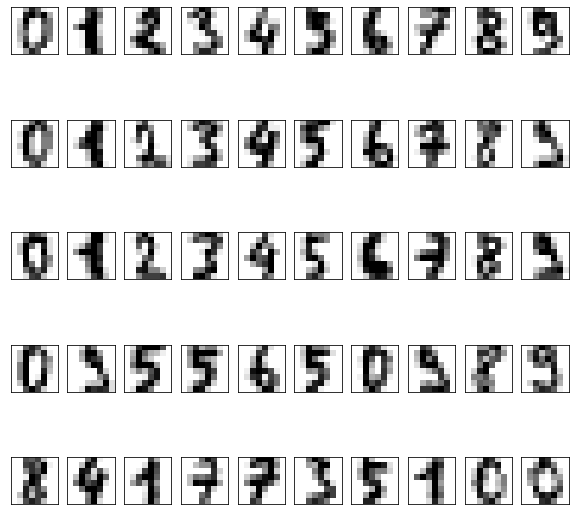

In [3]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

In [5]:
def Horizontal_Projection(image):
    array = np.array(image)
    horz_proj = np.array([np.count_nonzero(row) for row in array])
    return horz_proj

def Verticacl_Projection(image):
    array = np.array(image)
    img_trans = array.transpose()
    ver_proj = np.array([np.count_nonzero(row) for row in img_trans])

    return ver_proj

In [6]:
def correlation(x,y):
    fracA = sum((x-np.average(x))*(y-np.average(y)))
    fracB = np.sqrt(sum(np.power(x-np.average(x),2)))*np.sqrt(sum(np.power(y-np.average(y),2)))
    return fracA/fracB

def minkowski_distance(x,y,p):
    return np.sum(np.abs(x-y)**p)**(1/p)

def euclidianne_distance(x,y):
    return minkowski_distance(x,y,2)

def manhathan_distance(x,y):
    return minkowski_distance(x,y,1)

def lim_plus_distance(x,y):
    return np.max(np.abs(x-y))

def lim_min_distance(x,y):
    return np.min(np.abs(x-y))

def cosine(x,y):
    return np.sum(x*y)/(np.sqrt(np.sum(x**2))*np.sqrt(np.sum(y**2)))

# Using Vertical Projection

In [4]:
#Getting one Query Image
query_image = digits.images[7]
plt.imshow(query_image,cmap ='binary')
QueryProjection = Verticacl_Projection(query_image)

images_descriptors = [{ 'image':image,'desc':Verticacl_Projection(image), 'distance': euclidianne_distance(QueryProjection,Verticacl_Projection(image))} for image in digits.images]

images_descriptors.sort(key = lambda x:x['distance'])

plt.figure(figsize=(20,20))
for i in range(20):
    image_and_desc = images_descriptors[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

NameError: name 'Verticacl_Projection' is not defined

# Trying Pixel By Pixel

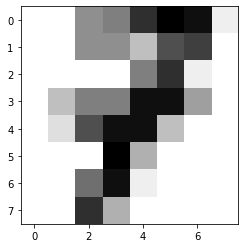

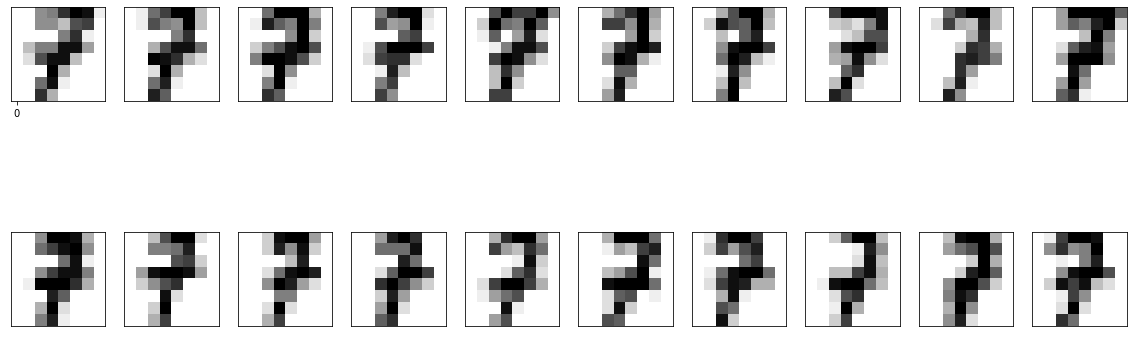

In [29]:
#Getting one Query Image
query_image = digits.images[7]
plt.imshow(query_image,cmap ='binary')
Querydesc = query_image.flatten()

images_descriptors = [{ 'image':image,'desc':image.flatten(), 'distance': euclidianne_distance(Querydesc,image.flatten())} for image in digits.images]

images_descriptors.sort(key = lambda x:x['distance'])

plt.figure(figsize=(20,20))
for i in range(20):
    image_and_desc = images_descriptors[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

# Trying the zenike

In [23]:
import mahotas
class ZernikeMoments:
	def __init__(self, radius):
		# store the size of the radius that will be
		# used when computing moments
		self.radius = radius
	def describe(self, image):
		# return the Zernike moments for the image
		return mahotas.features.zernike_moments(image, self.radius)

In [25]:
desc = ZernikeMoments(21)
moments = desc.describe(digits.images[0])

#Getting one Query Image
query_image = digits.images[7]
plt.imshow(query_image,cmap ='binary')
QueryZernike = desc.describe(query_image)

images_descriptors = [{ 'image':image,'desc':desc.describe(image), 'distance': euclidianne_distance(QueryZernike,desc.describe(image))} for image in digits.images]

images_descriptors.sort(key = lambda x:x['distance'])

plt.figure(figsize=(20,20))
for i in range(20):
    image_and_desc = images_descriptors[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

NameError: name 'ZernikeMoments' is not defined

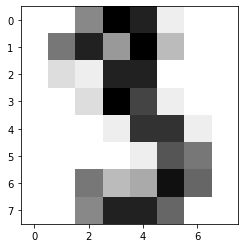

In [40]:
#Getting one Query Image
query_image = digits.images[3]
plt.imshow(query_image,cmap ='binary')
descriptor = desc.describe(query_image)

for image_and_desc in images_descriptors:
    image_and_desc['distance'] = euclidianne_distance(descriptor,image_and_desc['desc'])

images_descriptors.sort(key = lambda x:x['distance'])

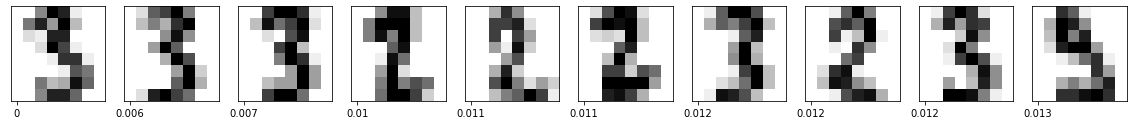

In [41]:
plt.figure(figsize=(20,20))
for i in range(10):

    image_and_desc = images_descriptors[i]

    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

# Using Pixel To Pixel Comparison & Correlation

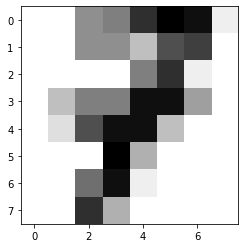

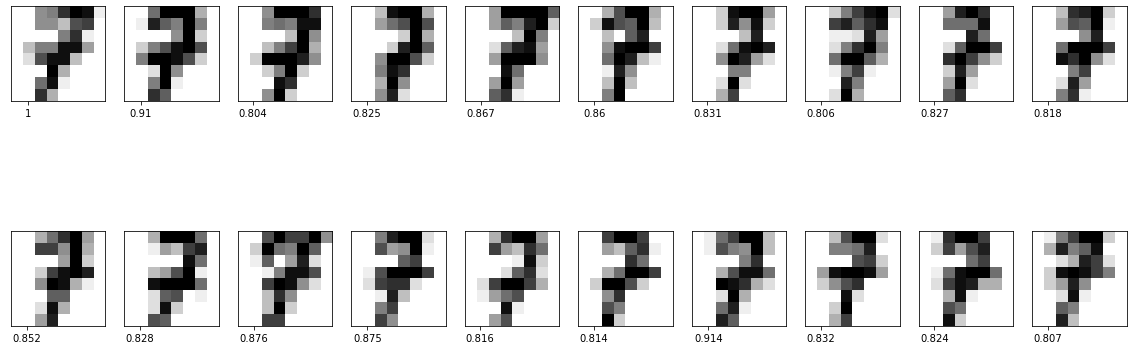

In [30]:
#Getting one Query Image
query_image = digits.images[7]
plt.imshow(query_image,cmap ='binary')
Querydesc = query_image.flatten()

images_descriptors = [{ 'image':image,'desc':image.flatten(), 'distance': correlation(Querydesc,image.flatten())} for image in digits.images]

result = images_descriptors = list(filter(lambda x:x['distance'] > 0.8,images_descriptors))


plt.figure(figsize=(20,20))
for i in range(20):
    image_and_desc = result[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

# EMNIST

In [9]:
#TODO on EMNIST
from emnist import list_datasets
from emnist import extract_training_samples,extract_test_samples
import emnist
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [12]:
letters, labels = extract_test_samples('letters')

In [11]:
letters = images[0:20000,:,:]


NameError: name 'images' is not defined

In [13]:
letters.shape

(20800, 28, 28)

# Using

In [17]:

initial = time.time()

def GetCorrelated_pixelTopixel(query_image):
    Querydesc = query_image.flatten()
    images_descriptors = []
    image_and_desc = {}

    for i in range(len(letters)):
        image = yield(letters[i])
        descriptor = yield(image.flatten())
        image_and_desc = yield({ 'image':image,'desc':descriptor, 'distance': np.corrcoef(Querydesc,descriptor)[0][1]})
        yield(images_descriptors.append(image_and_desc))
    
    return(list(filter(lambda x:x['distance'] > 0.6,images_descriptors)))


letters, labels = extract_test_samples('letters')
result = GetCorrelated_pixelTopixel(letters[7])

print("Execution Time : ",time.time() - initial)


Execution Time :  0.2458357810974121


Execution Time :  5.453909635543823
lenght of images is : 20800


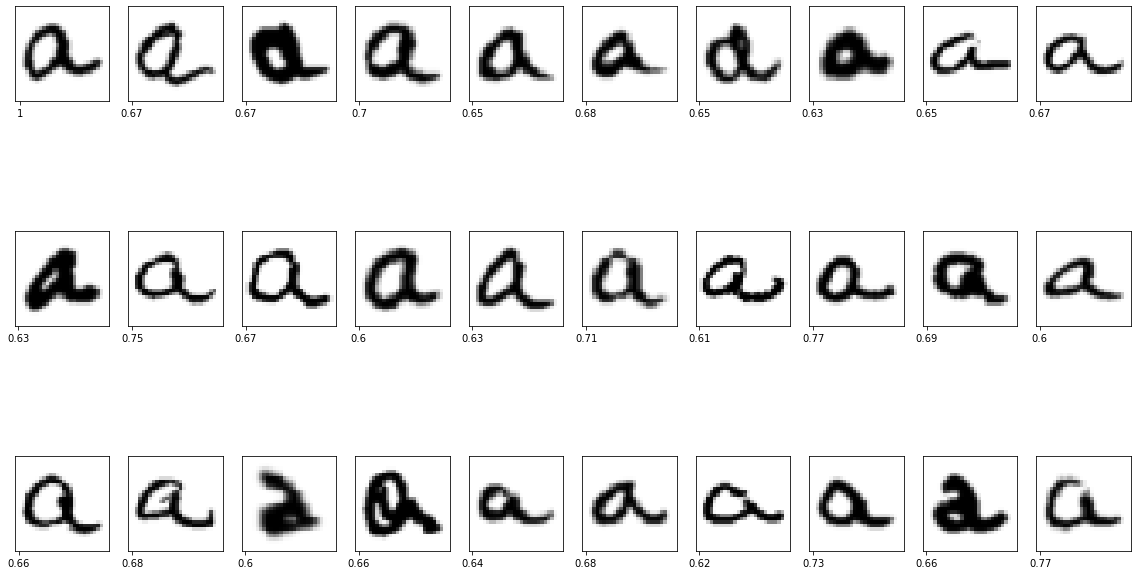

In [21]:
#Getting one Query Image
import time

initial = time.time()
letters, _ = extract_test_samples('letters')
query_image = letters[7]
#plt.imshow(query_image,cmap ='binary')
Querydesc = query_image.flatten()

images_descriptors = []
image_and_desc = {}

#####
for i in range(len(letters)):
    image = letters[i]
    descriptor = image.flatten()
    image_and_desc = { 'image':image,'desc':descriptor, 'distance': np.corrcoef(Querydesc,descriptor)[0][1]}
    images_descriptors.append(image_and_desc)
#####

print("Execution Time : ",time.time() - initial)

result = list(filter(lambda x:x['distance'] > 0.6,images_descriptors))
#images_descriptors.sort(key=lambda x:x['distance'],reverse=True)
#result = images_descriptors

print("lenght of images is :", len(images_descriptors))


plt.figure(figsize=(20,20))
for i in range(30):
    image_and_desc = result[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

In [22]:
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm

num_cores = multiprocessing.cpu_count()
inputs = tqdm(images_descriptors)

0%|          | 0/20800 [00:00<?, ?it/s]